<a href="https://colab.research.google.com/github/Obreintelly/Mchezo_Pesa_Football_Prediction_Analysis/blob/main/Mchezo_Pesa_Football_Results_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Introduction and Background**


 **a. Specifying the Question**


> As a football Analyst recruited by Mchezopesa Ltd, I'm tasked with predicting the results of two football teams based on who's playing at Home, who's playing Away and whether or not it is a friendly match.





 **b. Defining the Success Metric**


> For this analysis, our metric for success would be a model that has a prediction score of atleast 85%.





 **c. Understanding the Context**


> The FIFA World Football Ranking is a ranking system of national teams in association football. The ranking is based on the results team's post with the most succesful teams being ranked the highest. There is both a Women's World Rankings- FIFA Women's World Rankings and Men's World Ranking- FIFA Men's World Rankings. As of 9th April 2021, Belgium was the most succesful men's team in the world.

> The rankings follow a points-based system (modeled after the ELo rating System) where points are awarded based on the performance of all FIFA recognised full international matches.








 **d. Recording the Experimental Design**



> a) Data Cleaning/Preparation


> b) Exploratory Data Analysis







# **2. Importing Libraries**

In [316]:
#Importing Pandas library
import pandas as pd

#Importing Numpy Library
import numpy as np

#Importing Matplotlib Library

import matplotlib.pyplot as plt

#Importing Seaborn Library

import seaborn as sns

#Importing Scipy
import scipy
#Importing SKLearn
import sklearn

# **3. Loading Our Datasets**

In [317]:
#We have two datasets:
# Fifa Ranking Dataset and a Dataset containing Match Results 

#Loading the Ranking Dataset
ranking= pd.read_csv('/content/fifa_ranking.csv')

#Loading the Resukts Dataset
results = pd.read_csv('/content/results.csv')

# **4. Previewing Our datasets**

In [318]:
#Displaying first 5 rows of the Ranking dataset
ranking.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [319]:
#Displaying last rows of Ranking Dataset
ranking.tail()


,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
57788,206,Anguilla,AIA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57789,206,Bahamas,BAH,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57790,206,Eritrea,ERI,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57791,206,Somalia,SOM,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57792,206,Tonga,TGA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OFC,2018-06-07


In [320]:
#Displaying first 5 rows of our Results Dataset
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [321]:
#Displaying last 5 rows of our Results Dataset

results.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True
40838,2019-07-20,Papua New Guinea,Fiji,1,1,Pacific Games,Apia,Samoa,True


In [322]:
#Displaying Size pf our datasets
print('Fifa Ranking Dataset has: {} Rows, {} Columns'.format(*ranking.shape))

print('Fifa Results Dataset has: {} Rows, {} Columns'.format(*results.shape))

Fifa Ranking Dataset has: 57793 Rows, 16 Columns
Fifa Results Dataset has: 40839 Rows, 9 Columns


In [323]:
#Learning more about our dataset

ranking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rank                     57793 non-null  int64  
 1   country_full             57793 non-null  object 
 2   country_abrv             57793 non-null  object 
 3   total_points             57793 non-null  float64
 4   previous_points          57793 non-null  int64  
 5   rank_change              57793 non-null  int64  
 6   cur_year_avg             57793 non-null  float64
 7   cur_year_avg_weighted    57793 non-null  float64
 8   last_year_avg            57793 non-null  float64
 9   last_year_avg_weighted   57793 non-null  float64
 10  two_year_ago_avg         57793 non-null  float64
 11  two_year_ago_weighted    57793 non-null  float64
 12  three_year_ago_avg       57793 non-null  float64
 13  three_year_ago_weighted  57793 non-null  float64
 14  confederation         

In [324]:
#Learning more about our dataset
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        40839 non-null  object
 1   home_team   40839 non-null  object
 2   away_team   40839 non-null  object
 3   home_score  40839 non-null  int64 
 4   away_score  40839 non-null  int64 
 5   tournament  40839 non-null  object
 6   city        40839 non-null  object
 7   country     40839 non-null  object
 8   neutral     40839 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.5+ MB


In [325]:
#Checking number of unique features in our dataset
print(ranking.nunique())



rank                         209
country_full                 216
country_abrv                 216
total_points               11114
previous_points             1557
rank_change                  121
cur_year_avg                7419
cur_year_avg_weighted       7419
last_year_avg               7473
last_year_avg_weighted      7001
two_year_ago_avg            7575
two_year_ago_weighted       6513
three_year_ago_avg          7628
three_year_ago_weighted     5849
confederation                  6
rank_date                    286
dtype: int64


In [326]:
#Checking the Confederations we expect to see
ranking['confederation'].unique()

array(['UEFA', 'CONMEBOL', 'CONCACAF', 'CAF', 'AFC', 'OFC'], dtype=object)

In [327]:
#ranking.rank_date.unique()

In [328]:
#Checking number of unique features in our dataset
print(results.nunique())

date          15115
home_team       309
away_team       306
home_score       26
away_score       22
tournament      109
city           1960
country         266
neutral           2
dtype: int64


In [329]:
#results.country.unique()

In [330]:
results.neutral.unique()

array([False,  True])

In [331]:
results.date.unique()

array(['1872-11-30', '1873-03-08', '1874-03-07', ..., '2019-07-18',
       '2019-07-19', '2019-07-20'], dtype=object)

# **5. Data Cleaning**

In [332]:
#Checking our datasets meet the Completeness Principle
#Are there any duplicates in the ranking dataset?

ranking.duplicated().any().sum()

1

In [333]:
#Dropping the duplicates
ranking = ranking.drop_duplicates()

In [334]:
#Are there any duplicates in the results dataset?
results.duplicated().any().sum()

0

In [335]:
#Checking for any missing values
ranking.isna().any().sum()

0

In [336]:
#Checking for any missing values
results.isna().any().sum()

0

In [337]:
#To answer the question under study, we need to to merge the two datasets.
#Key question is how we do it and on which columns?
#The country feature is not helpful because in the results dataset, this refers to where a match was played. 
#We know FIFA rankings are updated on a monthly basis. As such merging our datasets on Year and Month will make sense
#We create the Year and Month columns in both our datasets
ranking['year'] = pd.DatetimeIndex(ranking['rank_date']).year
ranking['month'] = pd.DatetimeIndex(ranking['rank_date']).month


results['year'] = pd.DatetimeIndex(results['date']).year
results['month'] = pd.DatetimeIndex(results['date']).month


In [338]:
#Merging our datasets

fifa_df = results.merge(ranking, left_on=['year', 'month'], right_on=['year', 'month'], how='inner')


In [339]:
fifa_df.head(2)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1993-08-01,Colombia,Paraguay,0,0,FIFA World Cup qualification,Barranquilla,Colombia,False,1993,8,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,1993-08-01,Colombia,Paraguay,0,0,FIFA World Cup qualification,Barranquilla,Colombia,False,1993,8,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08


In [340]:
fifa_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4291108 entries, 0 to 4291107
Data columns (total 27 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   date                     object 
 1   home_team                object 
 2   away_team                object 
 3   home_score               int64  
 4   away_score               int64  
 5   tournament               object 
 6   city                     object 
 7   country                  object 
 8   neutral                  bool   
 9   year                     int64  
 10  month                    int64  
 11  rank                     int64  
 12  country_full             object 
 13  country_abrv             object 
 14  total_points             float64
 15  previous_points          int64  
 16  rank_change              int64  
 17  cur_year_avg             float64
 18  cur_year_avg_weighted    float64
 19  last_year_avg            float64
 20  last_year_avg_weighted   float64
 21  two_year

In [341]:
#Checking Size of Our new dataset
fifa_df.shape

(4291108, 27)

In [342]:
#Checking number of unique values in our dataset
fifa_df.nunique()

date                        4974
home_team                    292
away_team                    287
home_score                    23
away_score                    21
tournament                    72
city                        1583
country                      231
neutral                        2
year                          26
month                         12
rank                         209
country_full                 216
country_abrv                 216
total_points               11114
previous_points             1557
rank_change                  121
cur_year_avg                7419
cur_year_avg_weighted       7419
last_year_avg               7473
last_year_avg_weighted      7001
two_year_ago_avg            7575
two_year_ago_weighted       6513
three_year_ago_avg          7628
three_year_ago_weighted     5849
confederation                  6
rank_date                    286
dtype: int64

In [343]:
#Checking for duplicates
fifa_df.duplicated().any().sum()

0

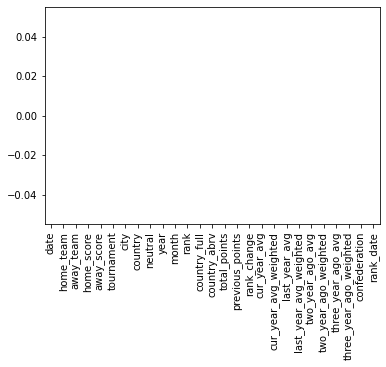

In [344]:
#Checking for Missing Values
fifa_df.isna().sum().plot(kind='bar')

In [345]:
#Dropping any irrelevant columns
#Country Abbreviation and Date do not add any necessary value for purposes of our study question
#We can therefore proceed to drop them from the dataset
fifa_df.drop(['date', 'country_abrv'], axis=1, inplace=True)

# **5 (a) Outliers**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


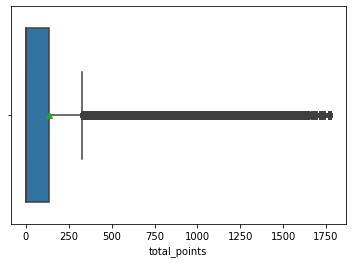

In [346]:
#Checking for Outliers in Our Dataset
bplot =sns.boxplot(fifa_df.total_points, showmeans=True)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


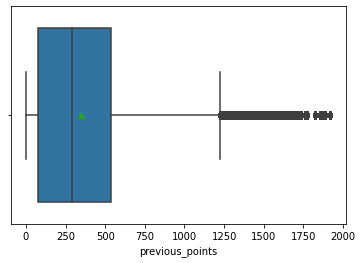

In [347]:
bplot =sns.boxplot(fifa_df.previous_points, showmeans=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


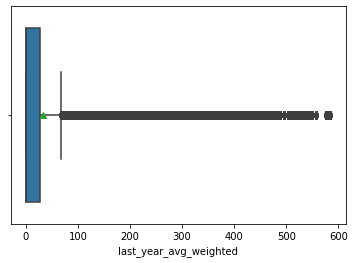

In [348]:
bplot = sns.boxplot(fifa_df.last_year_avg_weighted, showmeans=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


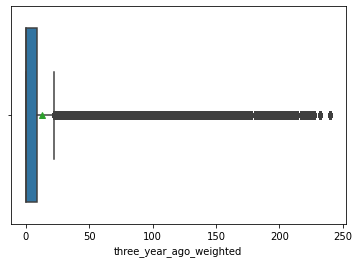

In [349]:
bplot =sns.boxplot(fifa_df.three_year_ago_weighted, showmeans=True)

In [350]:
#Although we have Outliers in our Dataset, they are infact actual points that teams received. 
#The consequences of curing these outliers woould be dire than non-action 

# **6. Feature Engineering**

In [351]:
#Dropping features that don't help with our research objective
#Country, Total Points, Previous Points, rank date, rank change, current year average, current year average weight, last year avergae, last year avaerage weighted
# two year average, weighted average two years ago, weighted average three years ago, average three years ago and Confederation do not have a bearing on 
# the ranking/performance of a team

#On the contrary, whether a team is the home or away side, the tournament type, where the match is played (Neutral ground or City at times-has to do with quality of pitch), 
#current rank of the two teams are most likely to have a bearing on the results of the football match and consequently the ranking of the teams


#We can therefore proceed to drop the features that do not help us.

In [352]:
fifa_df.drop(['country', 'total_points', 'previous_points', 'rank_change', 'cur_year_avg', 'cur_year_avg_weighted','last_year_avg', 'last_year_avg_weighted', 'two_year_ago_avg', 'two_year_ago_weighted','three_year_ago_avg', 'three_year_ago_weighted', 'confederation', 'rank_date' ], axis=1, inplace=True)

In [353]:
#Displaying Size of our New Dataset
fifa_df.shape

(4291108, 11)

In [354]:
#Previewing the first 5 rows of our dataset
fifa_df.head()

,home_team,away_team,home_score,away_score,tournament,city,neutral,year,month,rank,country_full
0,Colombia,Paraguay,0,0,FIFA World Cup qualification,Barranquilla,False,1993,8,1,Germany
1,Colombia,Paraguay,0,0,FIFA World Cup qualification,Barranquilla,False,1993,8,2,Italy
2,Colombia,Paraguay,0,0,FIFA World Cup qualification,Barranquilla,False,1993,8,3,Switzerland
3,Colombia,Paraguay,0,0,FIFA World Cup qualification,Barranquilla,False,1993,8,4,Sweden
4,Colombia,Paraguay,0,0,FIFA World Cup qualification,Barranquilla,False,1993,8,5,Argentina


In [355]:
#Analysing our dataset further, it appears the rank column has been organised in a descending format 
#and the Home and away teams are not matched to their respective countries.
#If we proceed with our analysis, we are likely to make errors.
#We need to match both the home and away teams with their correct current rank

In [356]:
#Matching the Home team to respective country
#Doing this will also give us the correct rank as rank is based on country
home_team = fifa_df[fifa_df.home_team== fifa_df.country_full]

home_team.head()

,home_team,away_team,home_score,away_score,tournament,city,neutral,year,month,rank,country_full
18,Colombia,Paraguay,0,0,FIFA World Cup qualification,Barranquilla,False,1993,8,19,Colombia
236,Peru,Argentina,0,1,FIFA World Cup qualification,Lima,False,1993,8,70,Peru
355,Uruguay,Ecuador,0,0,FIFA World Cup qualification,Montevideo,False,1993,8,22,Uruguay
594,Venezuela,Brazil,1,5,FIFA World Cup qualification,San Cristóbal,False,1993,8,94,Venezuela
725,Senegal,Zambia,0,0,FIFA World Cup qualification,Abidjan,True,1993,8,58,Senegal


In [357]:
#Appropriate the rank column for the Home Team
home_team.rename(columns={'rank' : 'home_rank'}, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [358]:
#Dropping the Month and Country full columns as they may not be useful in our analysis
#We keep the neutral column and drop City as neutrality of venue can determine match outcome
home_team.drop(['month', 'city','country_full'], axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [359]:
home_team.head()

,home_team,away_team,home_score,away_score,tournament,neutral,year,home_rank
18,Colombia,Paraguay,0,0,FIFA World Cup qualification,False,1993,19
236,Peru,Argentina,0,1,FIFA World Cup qualification,False,1993,70
355,Uruguay,Ecuador,0,0,FIFA World Cup qualification,False,1993,22
594,Venezuela,Brazil,1,5,FIFA World Cup qualification,False,1993,94
725,Senegal,Zambia,0,0,FIFA World Cup qualification,True,1993,58


In [360]:
#Matching the Away team to the respective country
#Doing this gives us the correct rank for the away team as this is based on country
away_team = fifa_df[fifa_df.away_team==fifa_df.country_full]
away_team.head()

,home_team,away_team,home_score,away_score,tournament,city,neutral,year,month,rank,country_full
66,Colombia,Paraguay,0,0,FIFA World Cup qualification,Barranquilla,False,1993,8,67,Paraguay
171,Peru,Argentina,0,1,FIFA World Cup qualification,Lima,False,1993,8,5,Argentina
368,Uruguay,Ecuador,0,0,FIFA World Cup qualification,Montevideo,False,1993,8,35,Ecuador
508,Venezuela,Brazil,1,5,FIFA World Cup qualification,San Cristóbal,False,1993,8,8,Brazil
692,Senegal,Zambia,0,0,FIFA World Cup qualification,Abidjan,True,1993,8,25,Zambia


In [361]:
#Appropriate the rank column for the Away Team
away_team.rename(columns={'rank' : 'away_rank'}, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [362]:
#Dropping the Month and Country full columns as they may not be useful in our analysis
#We keep the neutral column and drop City as neutrality of venue can determine match outcome
away_team.drop(['month', 'city','country_full'], axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [363]:
away_team.head()

,home_team,away_team,home_score,away_score,tournament,neutral,year,away_rank
66,Colombia,Paraguay,0,0,FIFA World Cup qualification,False,1993,67
171,Peru,Argentina,0,1,FIFA World Cup qualification,False,1993,5
368,Uruguay,Ecuador,0,0,FIFA World Cup qualification,False,1993,35
508,Venezuela,Brazil,1,5,FIFA World Cup qualification,False,1993,8
692,Senegal,Zambia,0,0,FIFA World Cup qualification,True,1993,25


In [364]:
#To have a single view of Home & Away teams and their rank among other features, we 
#Merge the Home and Away datasets

df = pd.merge(home_team, away_team, how='left', left_on=['home_team', 'away_team', 'home_score', 'away_score', 'tournament','neutral', 'year'], right_on=['home_team', 'away_team', 'home_score', 'away_score', 'tournament','neutral', 'year'])


In [365]:
df.head()

,home_team,away_team,home_score,away_score,tournament,neutral,year,home_rank,away_rank
0,Colombia,Paraguay,0,0,FIFA World Cup qualification,False,1993,19,67.0
1,Peru,Argentina,0,1,FIFA World Cup qualification,False,1993,70,5.0
2,Uruguay,Ecuador,0,0,FIFA World Cup qualification,False,1993,22,35.0
3,Venezuela,Brazil,1,5,FIFA World Cup qualification,False,1993,94,8.0
4,Senegal,Zambia,0,0,FIFA World Cup qualification,True,1993,58,25.0


In [366]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18789 entries, 0 to 18788
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   home_team   18789 non-null  object 
 1   away_team   18789 non-null  object 
 2   home_score  18789 non-null  int64  
 3   away_score  18789 non-null  int64  
 4   tournament  18789 non-null  object 
 5   neutral     18789 non-null  bool   
 6   year        18789 non-null  int64  
 7   home_rank   18789 non-null  int64  
 8   away_rank   17016 non-null  float64
dtypes: bool(1), float64(1), int64(4), object(3)
memory usage: 1.3+ MB


In [367]:
#If a game of football, a team wins if they have more number of goals than the other team,
#Draws if they have same number of goals as the other team and loses if they have less number
#of goals than the other team in a match.

#Therefore, knowing the number of goals both teams score 
#we can determine if there was a win, draw or loss

#Let's create a new column called Status

df['wld'] = df['home_score'] - df['away_score']

# Using functions we will assign to a column whether the match resulted in a win, draw or loss

def outcome (goals): 
  if goals >0:
    return 'Win'
  elif goals <0:
    return 'Lose'
  else:
    return 'Draw'

#Application on our dataset
df['home_team_status'] = df.wld.apply(lambda x: outcome(x))


In [368]:
df.head()

,home_team,away_team,home_score,away_score,tournament,neutral,year,home_rank,away_rank,wld,home_team_status
0,Colombia,Paraguay,0,0,FIFA World Cup qualification,False,1993,19,67.0,0,Draw
1,Peru,Argentina,0,1,FIFA World Cup qualification,False,1993,70,5.0,-1,Lose
2,Uruguay,Ecuador,0,0,FIFA World Cup qualification,False,1993,22,35.0,0,Draw
3,Venezuela,Brazil,1,5,FIFA World Cup qualification,False,1993,94,8.0,-4,Lose
4,Senegal,Zambia,0,0,FIFA World Cup qualification,True,1993,58,25.0,0,Draw


In [369]:
#Dropping the wld placeholder column 
df.drop('wld', axis=1, inplace=True)

In [370]:
df.head()

,home_team,away_team,home_score,away_score,tournament,neutral,year,home_rank,away_rank,home_team_status
0,Colombia,Paraguay,0,0,FIFA World Cup qualification,False,1993,19,67.0,Draw
1,Peru,Argentina,0,1,FIFA World Cup qualification,False,1993,70,5.0,Lose
2,Uruguay,Ecuador,0,0,FIFA World Cup qualification,False,1993,22,35.0,Draw
3,Venezuela,Brazil,1,5,FIFA World Cup qualification,False,1993,94,8.0,Lose
4,Senegal,Zambia,0,0,FIFA World Cup qualification,True,1993,58,25.0,Draw


In [371]:
#Checking our columns once more
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18789 entries, 0 to 18788
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   home_team         18789 non-null  object 
 1   away_team         18789 non-null  object 
 2   home_score        18789 non-null  int64  
 3   away_score        18789 non-null  int64  
 4   tournament        18789 non-null  object 
 5   neutral           18789 non-null  bool   
 6   year              18789 non-null  int64  
 7   home_rank         18789 non-null  int64  
 8   away_rank         17016 non-null  float64
 9   home_team_status  18789 non-null  object 
dtypes: bool(1), float64(1), int64(4), object(4)
memory usage: 1.5+ MB


In [372]:
#Displaying size of our dataset
df.shape

(18789, 10)

In [373]:
#Checking for duplicates
df.duplicated().any()

True

In [374]:
#Dropping Duplicates
df = df.drop_duplicates()

Text(0.5, 1.0, 'Distribution of missing values')

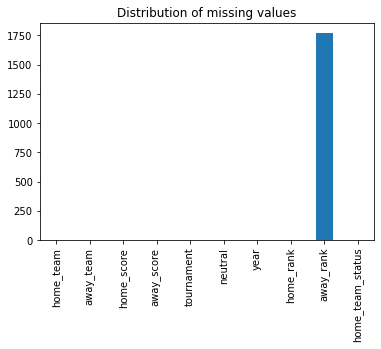

In [375]:
#Checking for Missing Values
df.isna().sum().plot(kind='bar')
plt.title('Distribution of missing values')

In [376]:
#We have around 1770 missing values on the away rank column
#This is about 10% of the data points in that column
#We however proceed to drop them as any sort of cure
#will not follow the FIFA defined process for determining the ranking of a country
df = df.dropna()

In [377]:
#Checking if there are still any missing values
df.isna().any()

home_team           False
away_team           False
home_score          False
away_score          False
tournament          False
neutral             False
year                False
home_rank           False
away_rank           False
home_team_status    False
dtype: bool

In [378]:
from sklearn.model_selection import train_test_split

In [379]:
#help(train_test_split)

# **Saving our Clean Dataset**

our dataset is ready for analysis

In [380]:
df.to_csv('df.csv', index=False)

# **7. Exploratory Data Analysis**